# Analysis of Covariance

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import savingfigR as sf 
import pingouin as pg 
import pandas as pd 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats

## Setting up the Data

In [2]:
calculus = np.array([10,30,50,60,80,100])
highschool = np.array([20,45,40,60,55,80])
section = np.concatenate((np.repeat('1', 3), np.repeat('2', 3)))
subject = np.arange(1,7)
mydata = pd.DataFrame({'calc':calculus, 'hs':highschool, 'sec':section, 'sbj':subject})

In [3]:
mydata.head()

,calc,hs,sec,sbj
0,10,20,1,1
1,30,45,1,2
2,50,40,1,3
3,60,60,2,4
4,80,55,2,5


## Plot Data

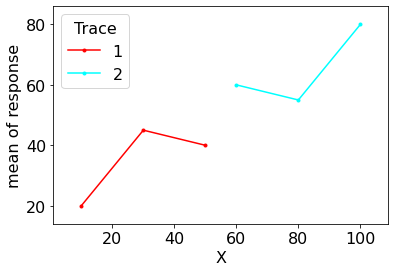

In [4]:
fig = interaction_plot(calculus, section, highschool)
plt.show()

sf.best_save(fig, 'interaction')

## ANOVA (no covariates)

In [5]:
pg.anova(data=mydata, dv='calc', between='sec', ss_type=3, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,sec,3750.0,1,3750.0,9.375,0.03759,0.700935
1,Within,1600.0,4,400.0,NaN,NaN,NaN


## ANCOVA (controlling for covariates)

In [6]:
pg.ancova(data=mydata, dv='calc', between='sec', covar='hs')

,Source,SS,DF,F,p-unc,np2
0,sec,126.480836,1,0.553354,0.510914,0.155727
1,hs,914.285714,1,4.000000,0.139326,0.571429
2,Residual,685.714286,3,NaN,NaN,NaN


## ANCOVA - Homogeneity of Regression Slopes

In [7]:
model = ols('calc ~ sec*hs', data=mydata).fit()
m1 = anova_lm(model)
print(m1)

           df        sum_sq       mean_sq             F    PR(>F)
sec       1.0  3.750000e+03  3.750000e+03  1.093750e+01  0.080538
hs        1.0  9.142857e+02  9.142857e+02  2.666667e+00  0.244071
sec:hs    1.0  9.663546e-28  9.663546e-28  2.818534e-30  1.000000
Residual  2.0  6.857143e+02  3.428571e+02           NaN       NaN


## ANCOVA - Normality of Residuals

In [8]:
model = ols('calc ~ hs + sec', data=mydata).fit()
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9328145980834961, pvalue=0.6020064949989319)

## ANCOVA - Homogeneity of Variance

In [9]:
pg.homoscedasticity(data=mydata, dv='calc', group='sec')

,W,pval,equal_var
levene,0.0,1.0,True


## ADJUSTED Mean Comparisons

In [10]:
# i can't find anything for this 

## Outputting Adjusted Means

In [11]:
# 

## Outputting Sample Effect Size

In [12]:
# 

## Power Analysis on ANCOVA

In [13]:
# 